<a href="https://colab.research.google.com/github/Gaurav55ks/Encryptix/blob/main/cc_fraud_detection_eda_99_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
files.upload()
!kaggle datasets download -d kartik2112/fraud-detection
!unzip fraud-detection.zip -d fraud_detection

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
100% 202M/202M [00:02<00:00, 72.0MB/s]
100% 202M/202M [00:02<00:00, 80.1MB/s]
Archive:  fraud-detection.zip
replace fraud_detection/fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fraud_detection/fraudTest.csv  
replace fraud_detection/fraudTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fraud_detection/fraudTrain.csv  y



In [3]:
fraud_train_df = pd.read_csv("/content/fraud_detection/fraudTrain.csv")
fraud_test_df = pd.read_csv("/content/fraud_detection/fraudTest.csv")
fraud_train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
fraud_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
fraud_train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
print(f"Null Values : {fraud_train_df.isnull().sum().sum()}")

Null Values : 0


In [7]:
# Removing Unnamed: 0 Columns
fraud_train_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_test_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
fraud_train_df["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [9]:
fraud_train_df["dob"] = pd.to_datetime(fraud_train_df["dob"])
fraud_train_df['trans_date_trans_time'] = pd.to_datetime(fraud_train_df['trans_date_trans_time'])

# EDA

## Fraud vs Not Fraud

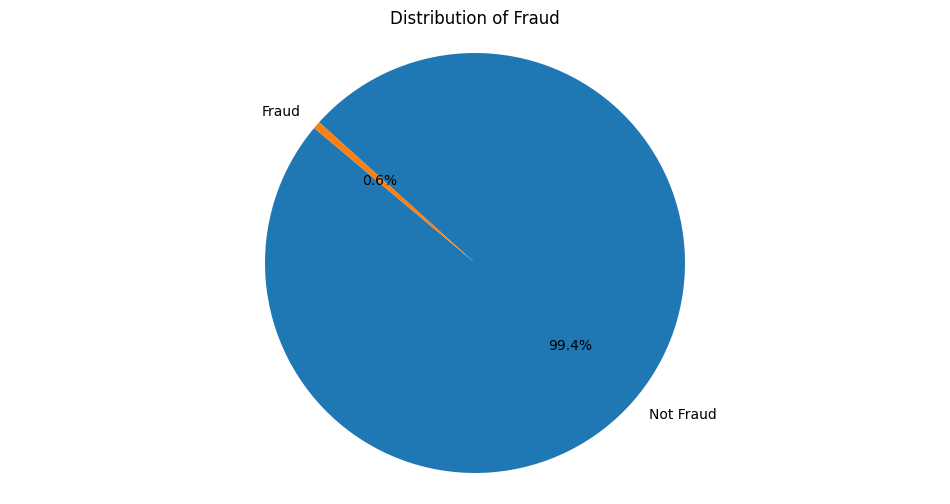

In [10]:
plt.figure(figsize = (12,6))
labels = ["Not Fraud","Fraud"]
values = fraud_train_df.is_fraud.value_counts()
plt.pie(values,labels = labels,autopct = "%1.1f%%",startangle = 140)
plt.title("Distribution of Fraud")
plt.axis("equal")
plt.show()

In [11]:
fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: count, Length: 443, dtype: int64

<ipython-input-12-f0c74b710102>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_job_title_df, x="count", y="job",palette="viridis",dodge=False)


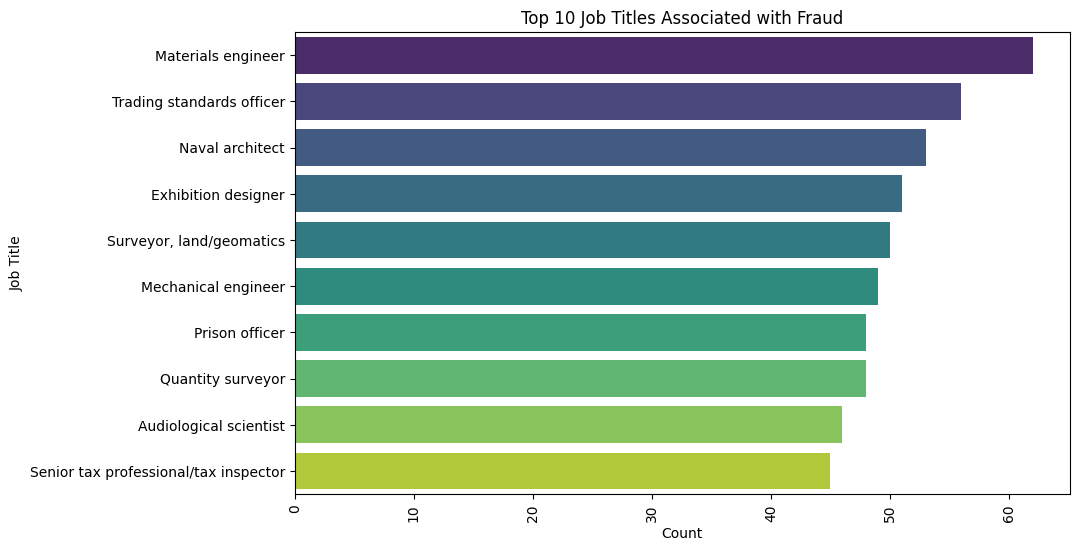

In [12]:
# Extract top 10 job titles associated with fraud and their counts
fraud_job_title = fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts().head(10)

# Convert to a DataFrame for easier plotting
fraud_job_title_df = fraud_job_title.reset_index()
fraud_job_title_df.columns = ['job', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_job_title_df, x="count", y="job",palette="viridis",dodge=False)
plt.title('Top 10 Job Titles Associated with Fraud')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.xticks(rotation=90)
plt.show()

In [13]:
fraud_train_df["category"].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

### Count of Transactions per Category

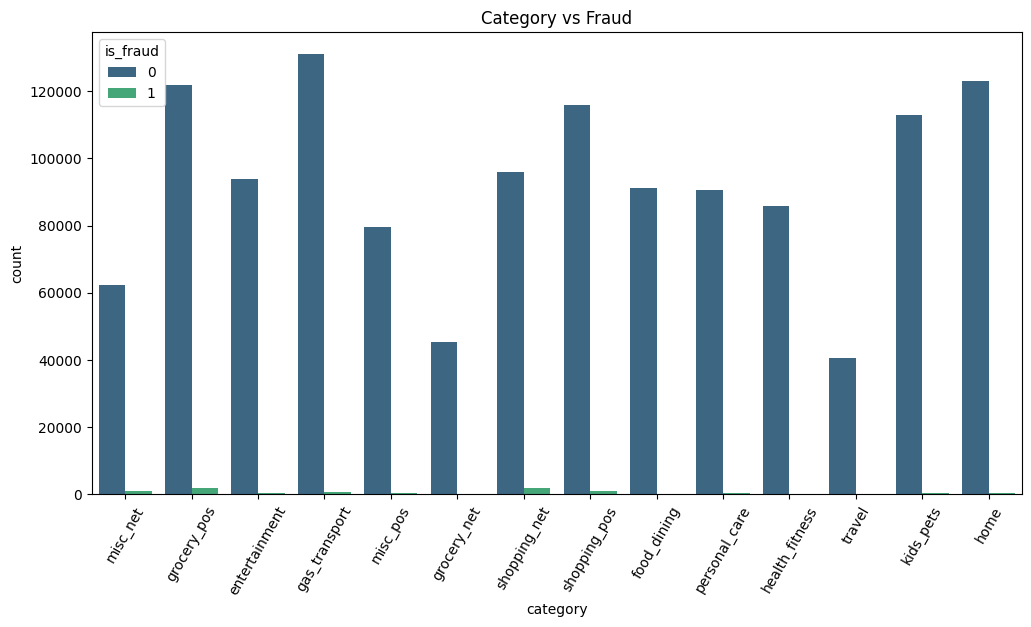

In [14]:
plt.figure(figsize = (12,6))
sns.countplot(x = "category",hue = "is_fraud",data = fraud_train_df,palette = "viridis")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

### Category vs Fraud

<ipython-input-15-909eeb08b9ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")


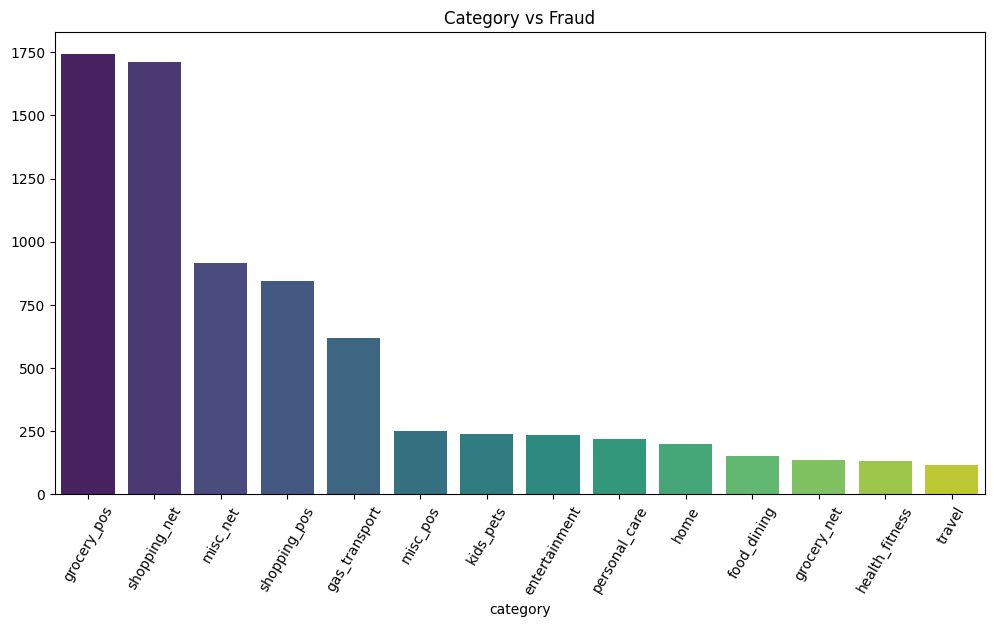

In [15]:
plt.figure(figsize = (12,6))
fraud_category = fraud_train_df[fraud_train_df["is_fraud"] == 1]["category"].value_counts()
sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

In [16]:
fraud_train_df["city"].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

### Distribution of Transaction Amounts
Given the distribution statistics of the amt column, it seems there are a few high-value transactions that might skew the histogram. To get a clearer view of the bulk of the data, we can limit the x-axis to focus on the more common transaction amounts.

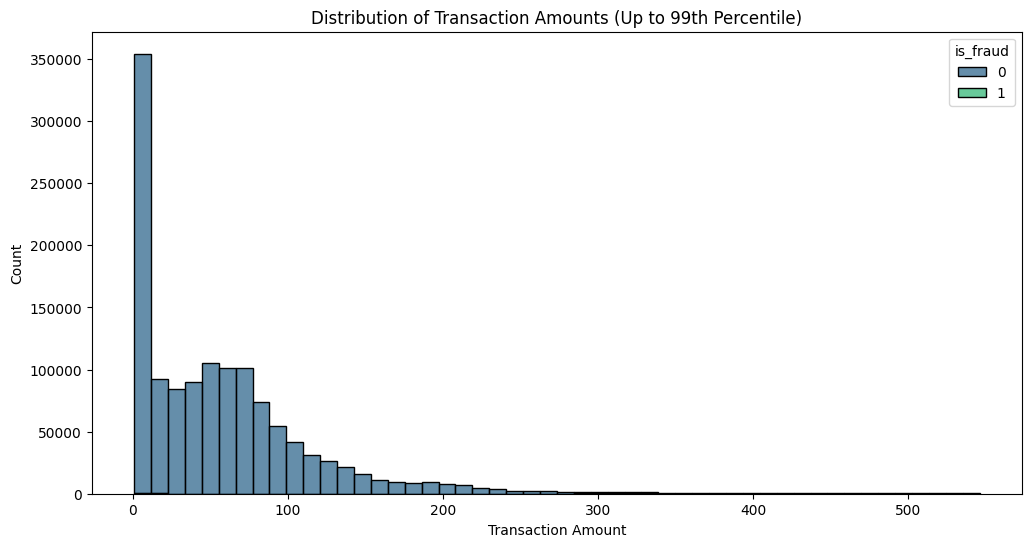

In [17]:
# Calculate the 99th percentile for the 'amt' column
amt_99 = fraud_train_df['amt'].quantile(0.99)
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud_train_df[fraud_train_df['amt'] <= amt_99], x="amt", hue="is_fraud", multiple="stack", bins=50, palette="viridis")
plt.title('Distribution of Transaction Amounts (Up to 99th Percentile)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

### Fraud Rate by State

<ipython-input-18-5341026c46db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate_by_state, x='is_fraud', y='state', palette='viridis')


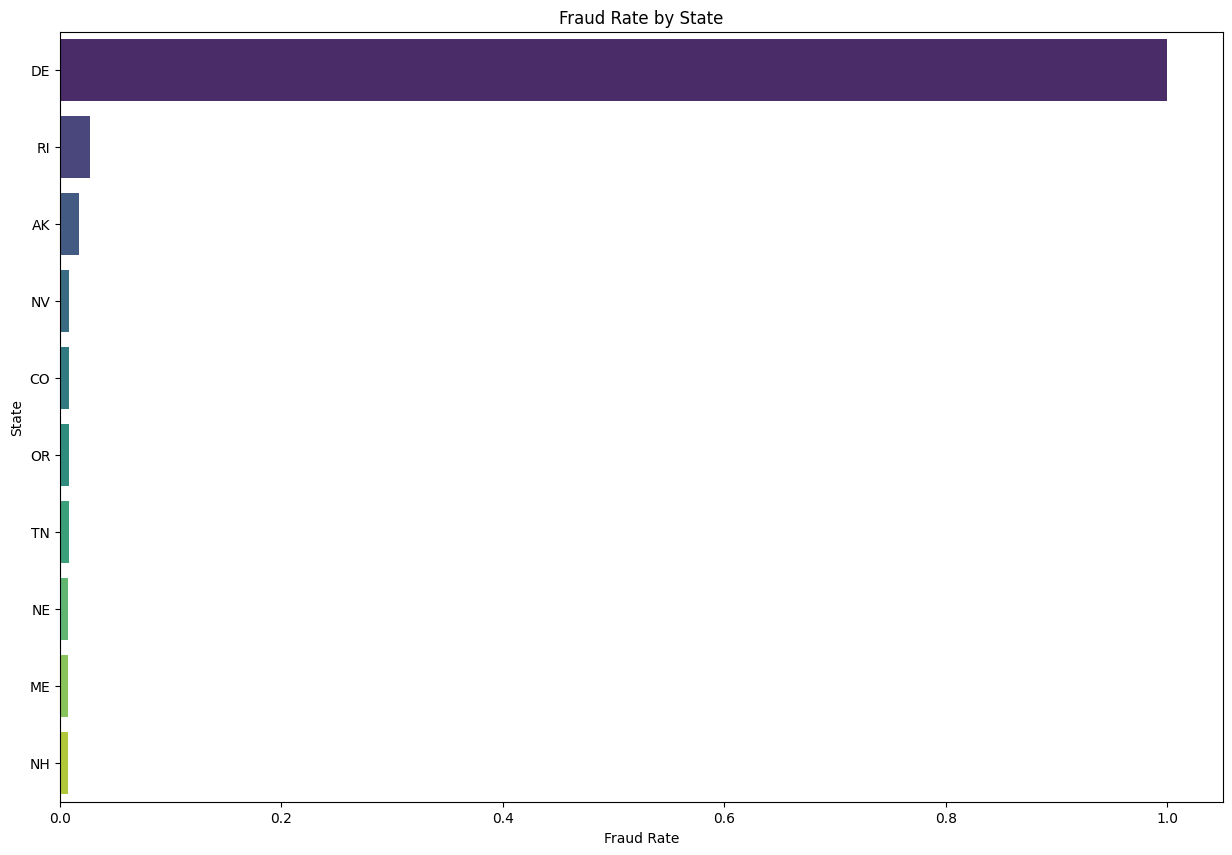

In [18]:
fraud_rate_by_state = fraud_train_df.groupby('state')['is_fraud'].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15, 10))
sns.barplot(data=fraud_rate_by_state, x='is_fraud', y='state', palette='viridis')
plt.title('Fraud Rate by State')
plt.xlabel('Fraud Rate')
plt.ylabel('State')
plt.show()

### Transactions Over Time

In [19]:
fraud_train_df.trans_date_trans_time.head()

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06
Name: trans_date_trans_time, dtype: datetime64[ns]

In [20]:
fraud_train_df.set_index('trans_date_trans_time', inplace=True)

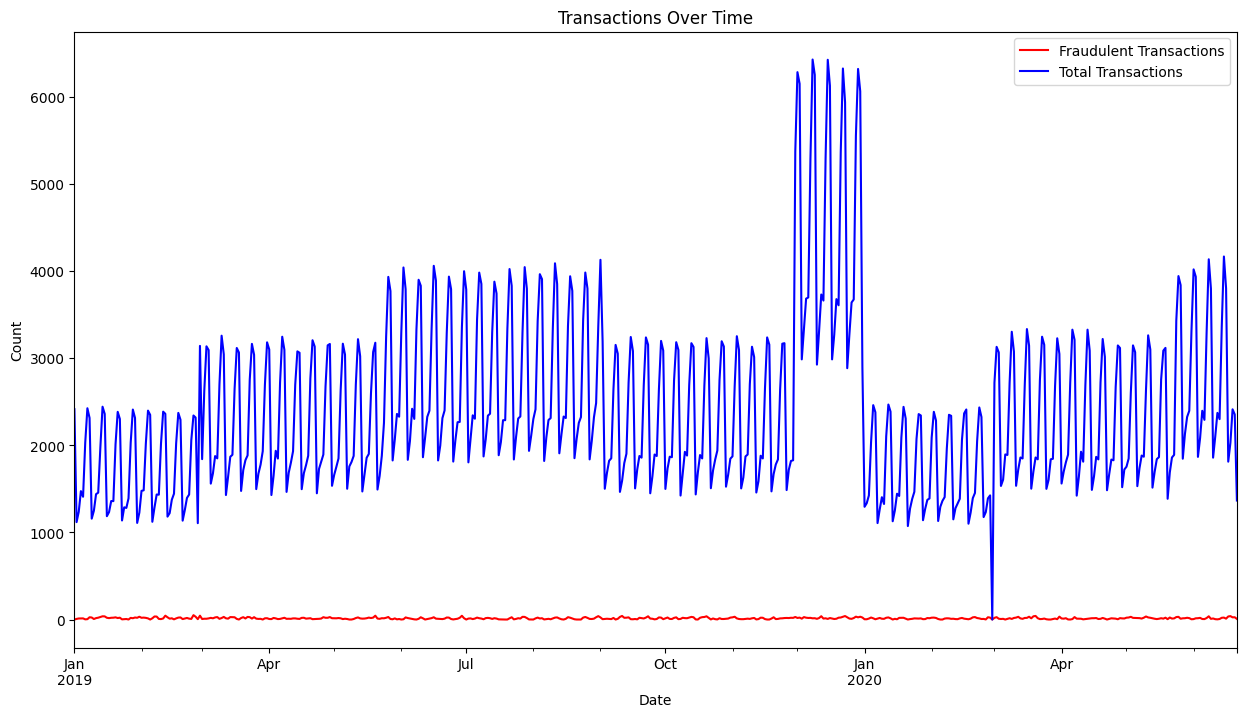

In [21]:
plt.figure(figsize=(15, 8))
fraud_train_df.resample('D')['is_fraud'].sum().plot(label='Fraudulent Transactions', color='red')
fraud_train_df.resample('D')['is_fraud'].count().plot(label='Total Transactions', color='blue')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

###  Fraudulent Transaction Locations

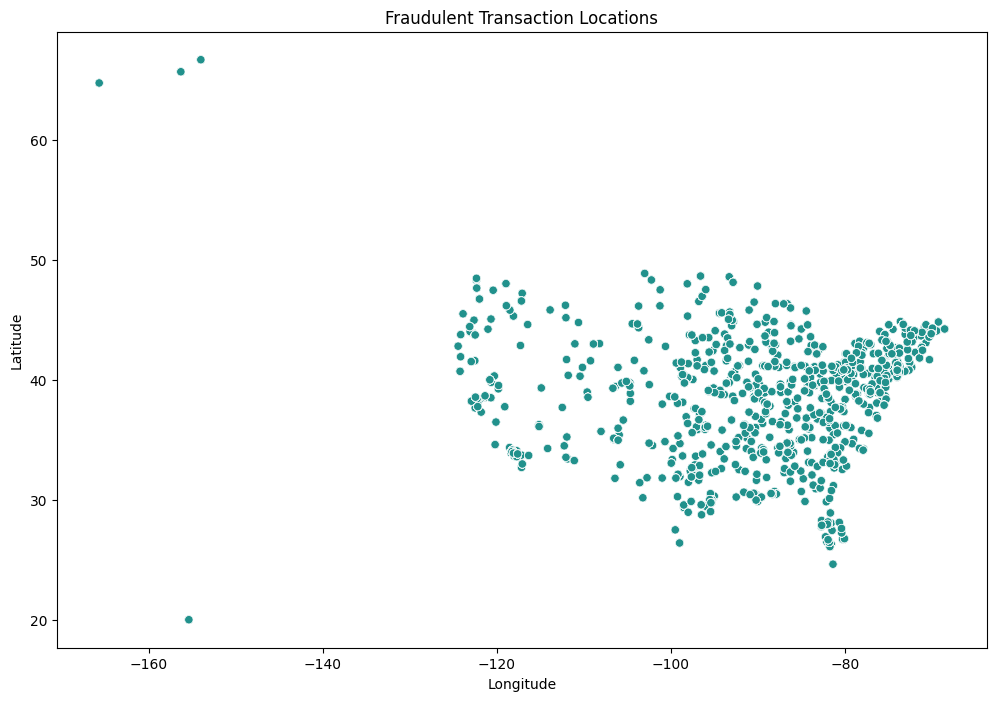

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fraud_train_df[fraud_train_df['is_fraud'] == 1], x='long', y='lat', hue='is_fraud', palette='viridis', legend=False)
plt.title('Fraudulent Transaction Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Using KMeans to add location_cluster column

In [23]:
coords = fraud_train_df[['lat', 'long']]
merch_coords = fraud_train_df[['merch_lat', 'merch_long']]
coords1 = fraud_test_df[['lat', 'long']]
merch_coords1 = fraud_test_df[['merch_lat', 'merch_long']]

# Fit the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)
kmeans_m = KMeans(n_clusters = 7,random_state = 42).fit(merch_coords)
kmeans1 = KMeans(n_clusters=10, random_state=42).fit(coords1)
kmeans_m1 = KMeans(n_clusters = 7,random_state = 42).fit(merch_coords1)

fraud_train_df['location_cluster'] = kmeans.labels_
fraud_train_df['location_cluster_merch'] = kmeans_m.labels_
fraud_test_df['location_cluster'] = kmeans1.labels_
fraud_test_df['location_cluster_merch'] = kmeans_m1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
fraud_train_df.drop(columns = ['first','last','cc_num','lat', 'long','merch_lat','merch_long','state','city','trans_num','street','zip','dob'],inplace = True)
fraud_test_df.drop(columns = ['first','last','cc_num','lat', 'long','merch_lat','merch_long','state','city','trans_num','street','zip','dob'],inplace = True)

In [25]:
categorical_col = ['job','category','merchant','gender']
numerical_col = ['amt','location_cluster','location_cluster_merch','unix_time','city_pop']
categorical_col , numerical_col

(['job', 'category', 'merchant', 'gender'],
 ['amt',
  'location_cluster',
  'location_cluster_merch',
  'unix_time',
  'city_pop'])

In [26]:
encoder = LabelEncoder()
for col in categorical_col:
  fraud_train_df[col] = encoder.fit_transform(fraud_train_df[col])
  fraud_test_df[col] = encoder.fit_transform(fraud_test_df[col])

In [27]:
input_col = numerical_col + categorical_col
target_col = 'is_fraud'

In [28]:
scaler = StandardScaler()
fraud_train_df[input_col] = scaler.fit_transform(fraud_train_df[input_col])
fraud_test_df[input_col] = scaler.fit_transform(fraud_test_df[input_col])

In [29]:
X = fraud_train_df[input_col]
X_test = fraud_test_df[input_col]
y = fraud_train_df[target_col]
y_test = fraud_test_df[target_col]

In [30]:
model_svc = SVC()
model_svc.fit(X, y)

SVC()

In [31]:
model_rfc = RandomForestClassifier(random_state = 42,n_estimators = 10,n_jobs = -1,max_depth = 20)
model_rfc.fit(X, y)

RandomForestClassifier(max_depth=20, n_estimators=10, n_jobs=-1,
                       random_state=42)

In [32]:
model_svc.score(X, y)

0.9951930900187017

In [33]:
y_pred_rfc = model_rfc.predict(X)
accuracy_score(y,y_pred_rfc)

0.9991308539148206

In [34]:
y_pred = model_svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9962499032784555